## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd  # import pandas
import numpy as np   # import numpy

import random
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import matplotlib.pyplot as plt    #import matplot
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:

df=pd.read_csv('ab_data.csv') # read the dataset

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape # get the rows which is 294478

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique() # get the no of unique users 

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1] # the of usrs converted is df[df['converted'] == 1] divided by the total users which is 294478.So it will be 11.9%.


,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1
28,913579,2017-01-24 09:11:39.164256,control,old_page,1
32,875124,2017-01-05 15:39:25.439906,treatment,new_page,1
36,831737,2017-01-11 21:18:20.911015,control,old_page,1









e. The number of times the `new_page` and `treatment` don't match.

In [6]:

df[((df['group'] != 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))]
#it is 3893 times where treatment and newpage didnot happen at the same time.

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


f. Do any of the rows have missing values?

In [7]:
df.info()# all the rows have 294478 non-null value.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
drop_index= df[((df['group'] != 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))].index
df2 = df.drop(drop_index)
df2


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df3= df2[((df['group'] != 'treatment') & (df['landing_page'] == 'new_page')) | 
        ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))].count()
df3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
sum(df2['user_id'].duplicated()) # show duplicated sum

1


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]  # show duplicated row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=None, keep='first', inplace=False) # drop the duplicated row

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [14]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].count() # total count of people boh converted and not converted

290585

In [16]:
df2[df2['converted'] == 1].count() # no of converted people

user_id         34753
timestamp       34753
group           34753
landing_page    34753
converted       34753
dtype: int64

In [17]:
#34753/290585=0.12 is the probability of converting(which is division of the above nos)

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'control'].count() # people in control group

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [19]:
df2[(df2['group'] == 'control') & (df2['converted'] == 1)].count() # control and converted so the probability will be
#17489/145274 = 0.12

user_id         17489
timestamp       17489
group           17489
landing_page    17489
converted       17489
dtype: int64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2[df2['group'] == 'treatment'].count() # get the no in treatment

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [21]:
df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].count() # treatment and converted so the probability will be
#17264/145311 = 0.119


user_id         17264
timestamp       17264
group           17264
landing_page    17264
converted       17264
dtype: int64

d. What is the probability that an individual received the new page?

In [22]:
df2[df2['landing_page'] == 'new_page'].count()   # no of new_pages from the landing_page

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [23]:
# probability that an individual received the new page is 145311/290584(total landing page count)=0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There is no sufficient evidence as the probabilty for converted and treatment is close to the converted and control groups. In addition, probability that an individual received the new page is 0.5.

<a id='ab_test'></a>
### Part II - A/B Test



Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is Old page is better or no less than the new page.
The alternative is new page is better.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
pnew=df.converted.sum()/len(df)   #total converted divided by length
pnew


0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
pold=df.converted.sum()/len(df) #total converted divided by length
pold

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
nnew=df2[df2['landing_page']=='new_page'].shape[0]  #total no of users in new_page
nnew


145311

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
nold=df2[df2['landing_page']=='old_page'].shape[0]   #total no of users in old_page
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted=np.random.binomial (nnew, pnew, 1)/nnew
pn=new_page_converted.mean()
pn

0.12021801515370481

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted=np.random.binomial(nold,pold,1)/nold 
po=old_page_converted.mean()

po

0.11952586147555654

In [30]:
new_p=np.random.binomial(nold,pn,1)/nold
new_p

array([ 0.12021422])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
po-pn


-0.00069215367814827455

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs=[]
for _ in range (10000):
    
    old_page_converted = np.random.binomial(1, po, nold)
    ocp = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, pn, nnew)
    ncp = new_page_converted.mean()
    p_diffs.append(ncp - ocp)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

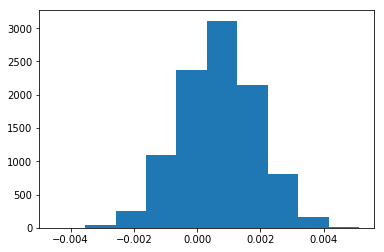

In [33]:
plt.hist(p_diffs);  # plot histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
ctr_c = df2.query('group == "control"')['converted'].mean()
trt_c = df2.query('group == "treatment"')['converted'].mean()
df2_diff = trt_c-ctr_c
df2_diff

-0.0015790565976871451

In [35]:
pvalue = (p_diffs > df2_diff).mean()
pvalue

0.96879999999999999

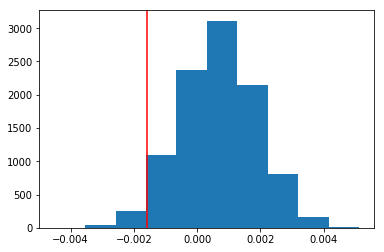

In [36]:
plt.hist(p_diffs)
plt.axvline(x=df2_diff, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p value is the (po-pn)+0.873=0.8732. This means the probability that the  0.8732.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]

print(convert_old, convert_new, nold, nnew)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145274 145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
 z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [nold, nnew], alternative='smaller')
 z_score, p_value



(1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The P-value of 0.905 shows that the null hypothesis is the one to be accepted(old_page is better or same as the newpage).0.905 is greater than 0.05.The simulation p value is 0.8732 and the z test is 0.905. The two values are close and well above 0.05.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline
df2 = pd.read_csv('ab_data.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [40]:
df2['intercept'] = 1 # intercept column added
# df2['ab_page'] = pd.get_dummies(df2['landing_page'])['ab_page']
df2[['not_ab_page','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('not_ab_page', axis=1) # drop the not_ab_page column
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) # fit a logistic regression model
results = log_mod.fit()
results.summary()#see the result

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:               7.093e-06
Time:                        15:47:42   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:

1/np.exp(-1.9887), 1/np.exp(-0.014) # get exponential for analyzing

(7.3060297473667584, 1.0140984589384923)

In [ ]:
For a unit decrease in ab_page, conversion is 1.014 times ahowing constant change.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The P value  on ab_page is 0.216. In part II we only wnated to prove that  having a new page is better.We didnot consider anyother scenario.Therefore, Part II was only one side test.But, part III considers both directions distribution(both end).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering all the factors in a regression model helps to better undertstand and design the regression model.But,it also causes covariance(two or more variables having correlation). This may inturn cause problems when e=interpreting results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline
df3 = pd.read_csv('countries.csv')
df4=pd.merge(df2, df3, on='user_id', how='inner')
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [47]:
df4['intercept'] = 1 # intercept column added
#df2['ab_page'] = pd.get_dummies(df2['landing_page'])['ab_page']
df4[['not_ab_country','ab_country']] = pd.get_dummies(df4['group'])
df4 = df4.drop('not_ab_country', axis=1) #drop the not_ab_country column
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ab_country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0


In [48]:
df4[['ab_CA','ab_UK','ab_US']] = pd.get_dummies(df4['country'])
#df4 = df4.drop('not_ab_UK', axis=1)
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ab_country,ab_CA,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,1


In [49]:
df4[['not_ab_page','ab_page']] = pd.get_dummies(df4['group'])
df4 = df4.drop('not_ab_page', axis=1)

In [50]:
df4['intercept'] = 1 # intercept column added
#df2['ab_page'] = pd.get_dummies(df2['landing_page'])['ab_page']
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'ab_CA','ab_UK']]) # fit a logistic regression model
results = log_mod.fit() #
results.summary() #see the result

Optimization terminated successfully.
         Current function value: 0.366238
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294474
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:               1.911e-05
Time:                        16:00:48   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2487
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9892      0.009   -225.246      0.000      -2.007      -1.972
ab_page       -0.0140      0.011     -1.234      0.217      -0.036       0.008
ab_CA         -0.0357      0.027     -1.339      0.181      -0.088       0.017
ab_UK          0.0093      0.013      0.701      0.483      -0.017       0.035
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
The p value  shows that have both ab_country and ab_page have similar effect.

SyntaxError: invalid syntax (<ipython-input-51-f63e323a4f12>, line 1)

In [52]:

df4[['not_US_ind_ab_page','US_ind_ab_page']]= pd.get_dummies(df4['ab_page'])
df4 = df4.drop('not_US_ind_ab_page', axis=1)
df4[['not_CA_ind_ab_page','CA_ind_ab_page']] = pd.get_dummies(df4['ab_page'])
df4 = df4.drop('not_CA_ind_ab_page', axis=1)
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'ab_US', 'ab_CA', 'US_ind_ab_page', 'CA_ind_ab_page']])

results = log_mod.fit() #
results.summary()

         Current function value: 0.366238
         Iterations: 35


LinAlgError: Singular matrix

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0